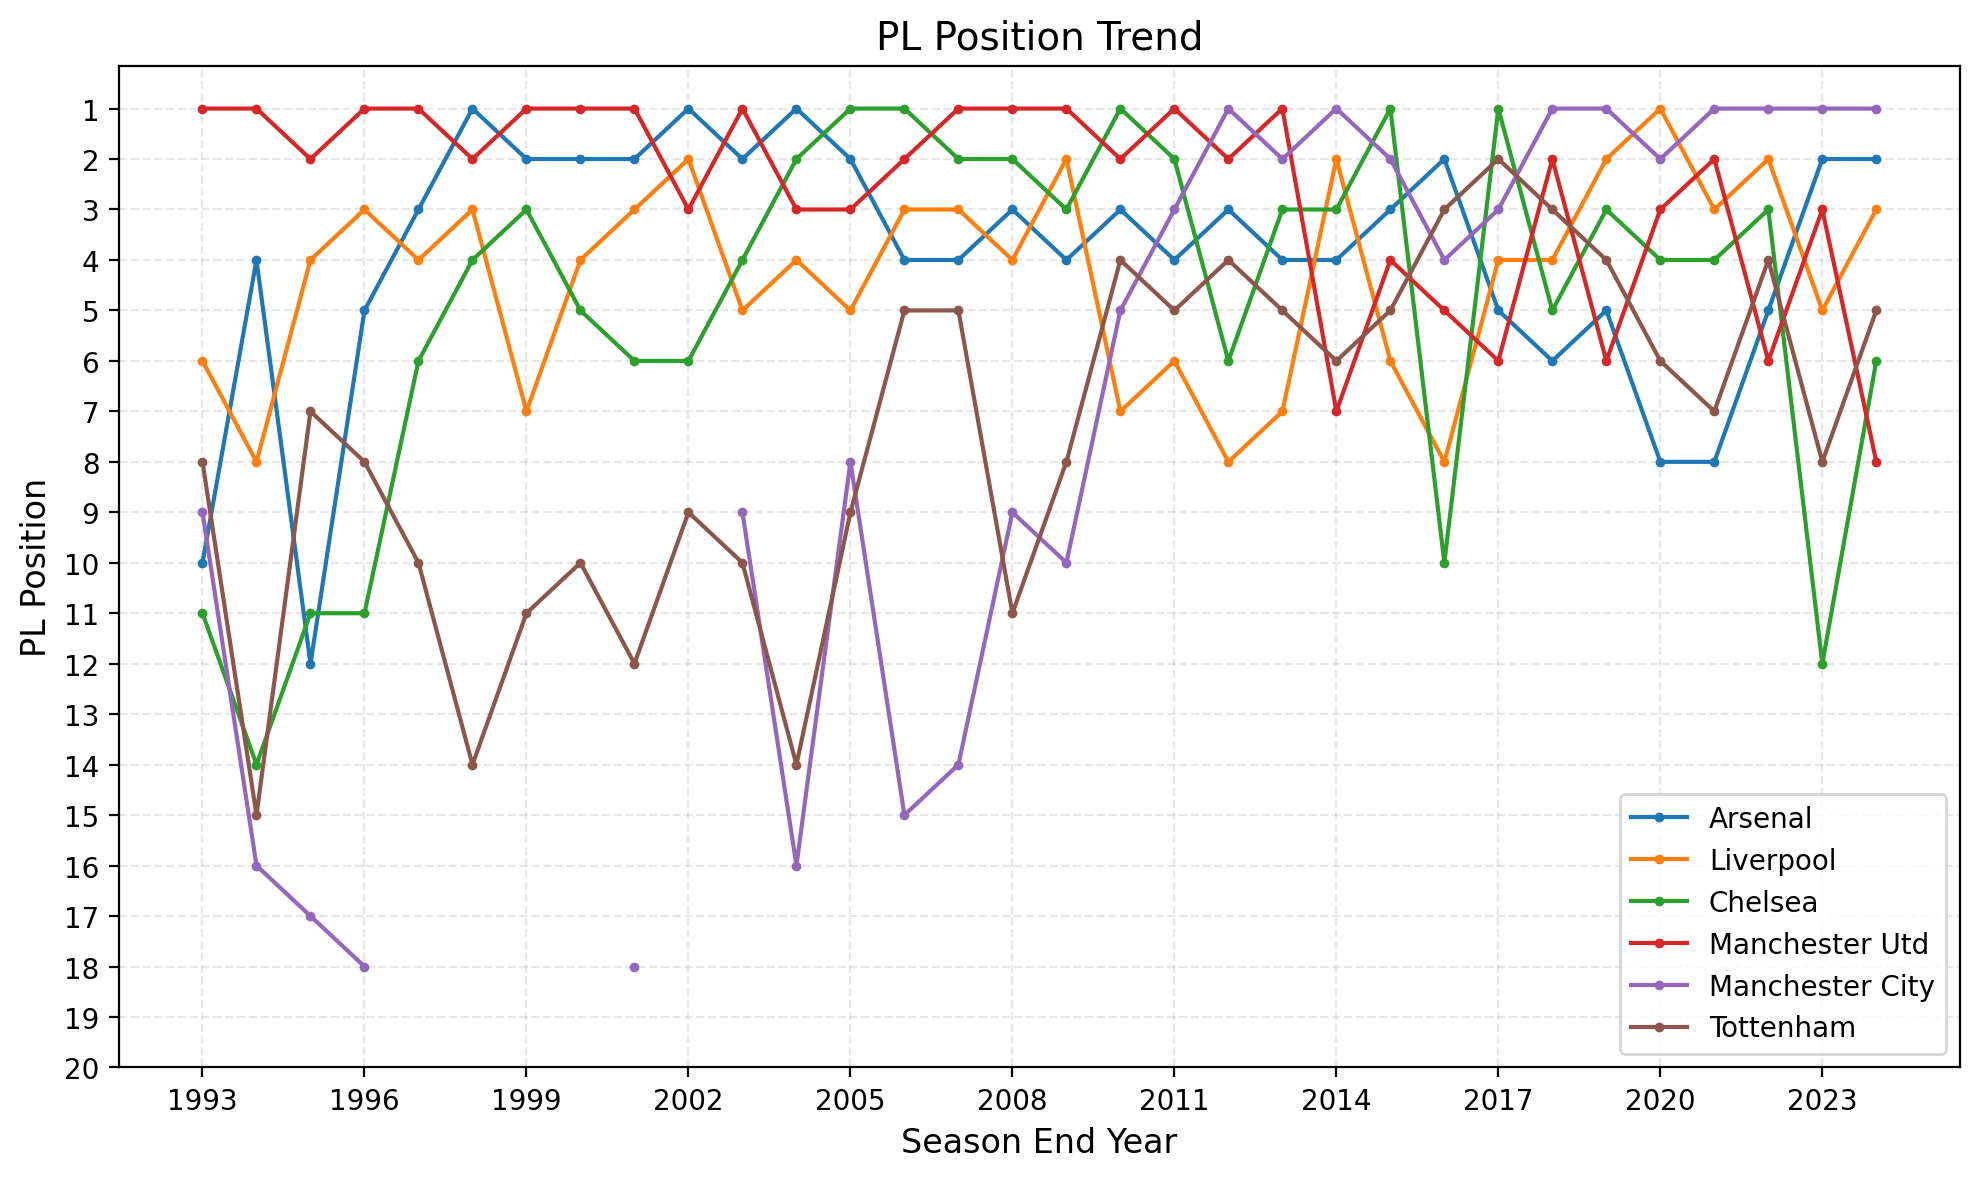

In [1]:
## eg1_PL position trend

import matplotlib.pyplot as plt
import pandas as pd

# Load data and check the dataframe
df = pd.read_csv(r"C:\Users\16254\Desktop\numpy & pandas\pl-tables-1993-2024.csv")
#print(df.head())

# Pivot the data into wide format
new_df = df.pivot(index = 'season_end_year', columns = 'team', values = 'position')
#print(new_df.head())

# Teams to display
teams = ['Arsenal', 'Liverpool', 'Chelsea', 'Manchester Utd', 'Manchester City', 'Tottenham']

plt.figure(figsize = (10, 6), dpi = 200)

for team in teams:
    plt.plot(new_df.index, 
             new_df[team], 
             '.-',
             linewidth = 1.5,
             markersize = 5,
             label = team
            )

plt.gca().invert_yaxis()  # gca() is a function to Get Current Axes. (Remember it needs parentheses to call it!!)
# Here we invert y_axis because visually it corresponds to our intuition.( When the team's ranking goes up, the line graph will move upwards)

# Axis labels
plt.xlabel('Season End Year', fontsize = 12)
plt.ylabel('PL Position', fontsize = 12)
plt.title('PL Position Trend', fontsize = 14)

# Tick marks
plt.xticks(range(1993, 2025, 3))  # Show every 2 years
plt.yticks(range(1, 21))  # Explicitly show all ranking positions

plt.grid(True, alpha = 0.3, linestyle = '--') # alpha must be within the 0-1 range, inclusive.
             
plt.legend()

plt.savefig('PL Position Trend')

plt.tight_layout()  # Automatically adjust layout
plt.show()


   minute       result      X      Y        xG         player h_a situation  \
0      92  MissedShots  0.823  0.369  0.062365  Mohamed Salah   h  OpenPlay   
1      84    SavedShot  0.920  0.532  0.439938  Mohamed Salah   a  OpenPlay   
2      87  BlockedShot  0.886  0.566  0.096760  Mohamed Salah   h  OpenPlay   
3       0    SavedShot  0.964  0.688  0.049131  Mohamed Salah   a  OpenPlay   
4      16  MissedShots  0.900  0.677  0.060320  Mohamed Salah   a  OpenPlay   

   season  shotType      h_team      a_team  h_goals  a_goals  \
0    2014  LeftFoot     Chelsea     Swansea        4        2   
1    2014  LeftFoot   Tottenham     Chelsea        5        3   
2    2014  LeftFoot  Fiorentina    Atalanta        3        2   
3    2014  LeftFoot    Sassuolo  Fiorentina        1        3   
4    2014  LeftFoot    Sassuolo  Fiorentina        1        3   

                  date player_assisted lastAction  
0  2014-09-13 15:00:00     Eden Hazard       Pass  
1  2015-01-01 17:30:00     Ede

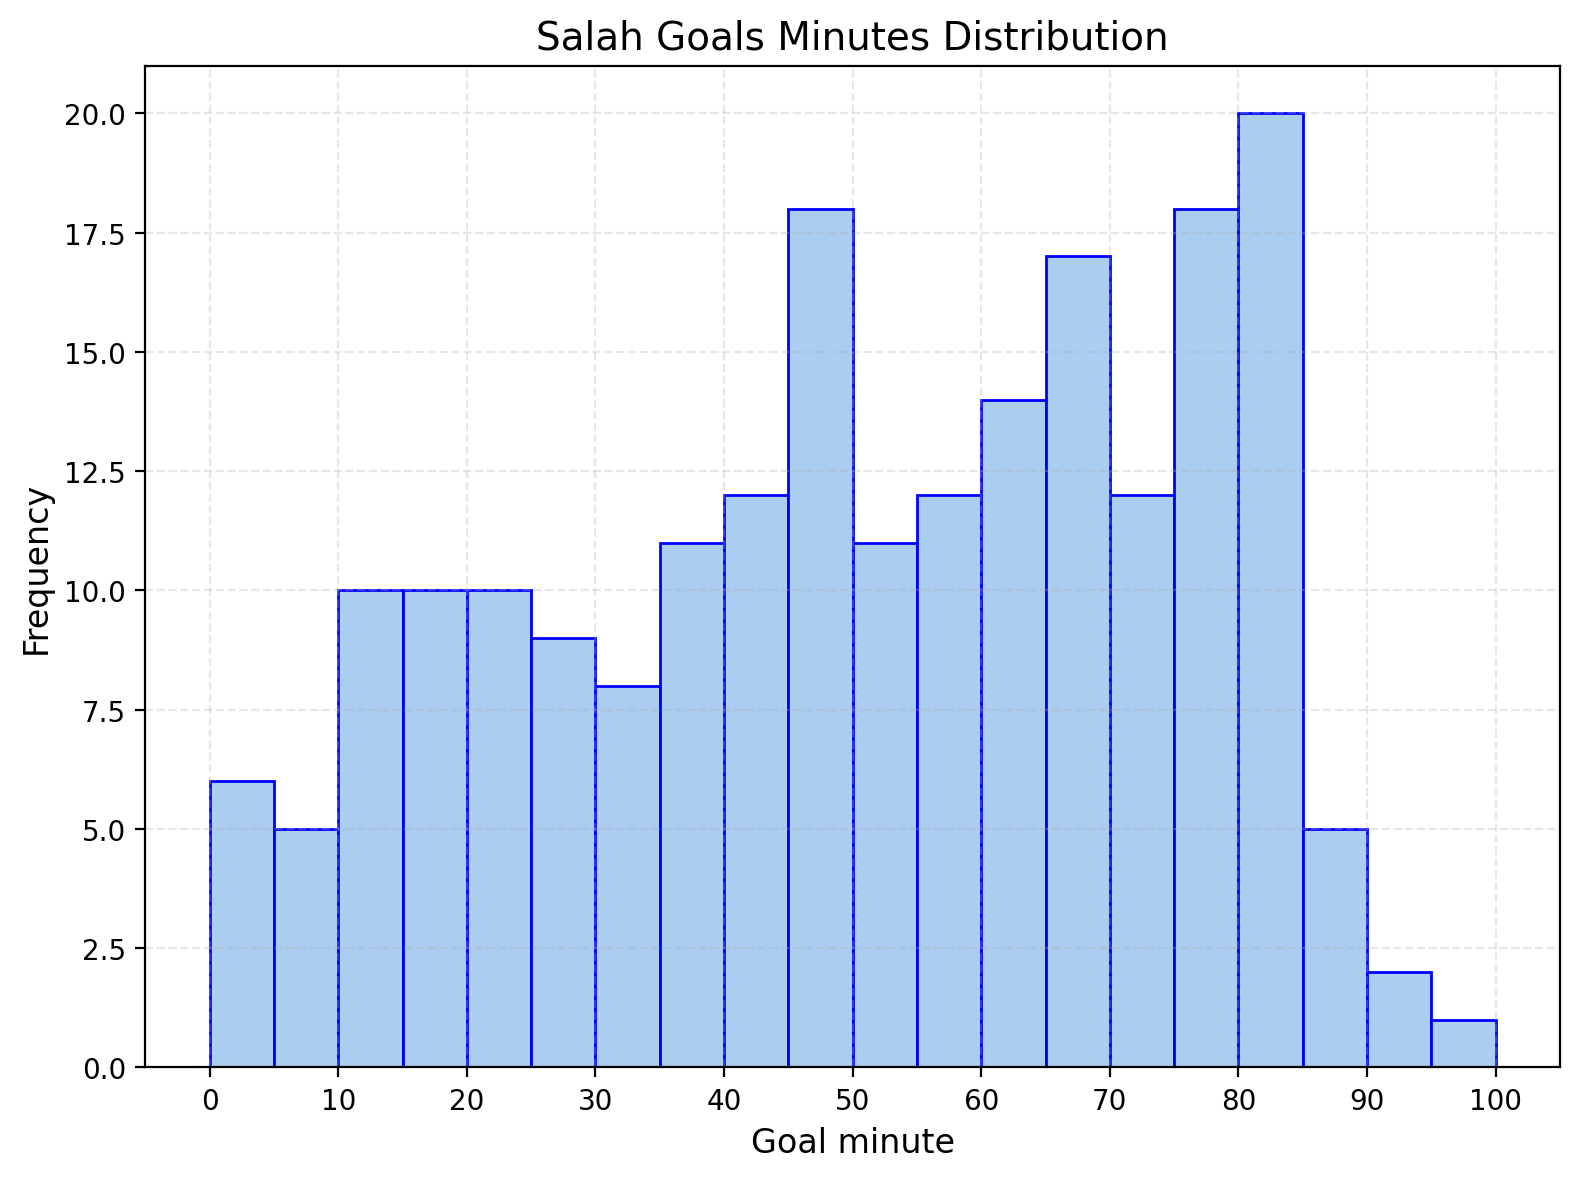

In [8]:
## eg2_Salah_goals_minutes

import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv(r"C:\Users\16254\Desktop\numpy & pandas\Matplotlib\Salah_all_PL_shots.csv",encoding = 'latin1')
print(df.head())

# Data cleaning
cleaned_minutes = df.loc[(df['minute'] >= 0) & (df['minute'] <= 120) & (df['result'] == 'Goal')]['minute']

plt.figure(figsize = (8, 6), dpi = 200)

plt.hist(cleaned_minutes, bins = 20, range = (0, 100), color = '#abcdef', edgecolor = 'b')

plt.xlabel('Goal minute', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.title('Salah Goals Minutes Distribution', fontsize = 14)

plt.xticks(range(0, 101, 10))
plt.grid(True, alpha = 0.3, linestyle = '--')

plt.tight_layout()
plt.savefig("Salah_goals_minutes_hist.png", dpi=200)

plt.show()

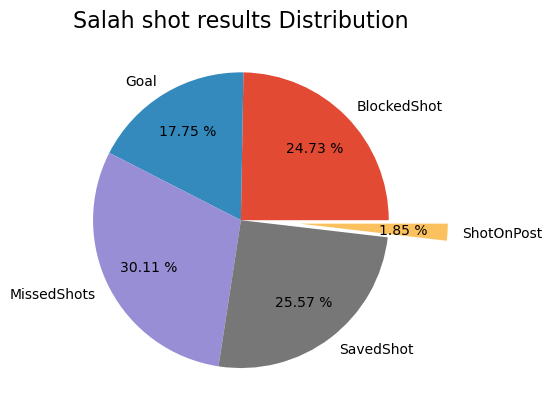

In [28]:
# eg3_Salah_shot_results

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\16254\Desktop\numpy & pandas\Matplotlib\Salah_all_PL_shots.csv", encoding = 'latin1')

# Data cleaning
df['result'].isnull().values.any()  # Check if any value in result column is NaN

df['counts'] = 1
results = df.groupby(['result'])['counts'].sum()
#print(results)

plt.style.use('ggplot')

labels = results.index
explode = [0, 0, 0, 0, 0.4]

plt.pie(results, labels = labels, autopct = '%.2f %%', pctdistance = 0.7, explode = explode)
# '%.2f %%' means the percentage value will be shown as a floating-point number with two decimal places, followed by a % symbol.
# In Python, % is a special character, so to display a literal % sign, you need to use %%.

plt.title('Salah shot results Distribution', fontsize = 16)

plt.savefig('Salah shot results Distribution')
plt.show()